# Transformaciones e Inferencia Estadistica

In [17]:
import scipy.stats as stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### PROBLEMA 1

In [3]:
df = pd.read_csv("DF Problema1c.csv")
df

,Empleados,Salario,Costo de Capacitación,Producción Generada,Satisfacción del Cliente Interna,Ventas Generadas,Ausentismo
0,Empleado 1,4620,354,10001,7,80014,5
1,Empleado 2,5100,499,9800,8,75000,6
2,Empleado 3,4550,450,9500,6,69000,4
3,Empleado 4,4751,470,9999,9,71000,3
4,Empleado 5,4848,380,9750,7,76500,2
5,Empleado 6,4932,370,9680,6,79814,5
6,Empleado 7,5040,330,9786,8,77658,4
7,Empleado 8,4671,350,9650,5,78500,2
8,Empleado 9,4699,415,10100,9,73000,2
9,Empleado 10,4914,394,10050,10,74000,3


In [4]:
columnas = ['Empleados']
df = df.drop(columnas, axis=1)
df

,Salario,Costo de Capacitación,Producción Generada,Satisfacción del Cliente Interna,Ventas Generadas,Ausentismo
0,4620,354,10001,7,80014,5
1,5100,499,9800,8,75000,6
2,4550,450,9500,6,69000,4
3,4751,470,9999,9,71000,3
4,4848,380,9750,7,76500,2
5,4932,370,9680,6,79814,5
6,5040,330,9786,8,77658,4
7,4671,350,9650,5,78500,2
8,4699,415,10100,9,73000,2
9,4914,394,10050,10,74000,3


In [7]:
df_NewEmployes = pd.read_csv("DF Problema1c NewEmployes.csv")
df_NewEmployes

,Salario,Costo de Capacitación,Producción Generada,Satisfacción del Cliente Interna,Ventas Generadas,Ausentismo
0,4700,420,9800,8,?,3
1,4900,450,9600,7,?,5
2,4850,380,10000,8,?,4


In [11]:
# REGRESIÓN

# Escalamos las variables del dataset inicial
x = df[['Salario', 'Costo de Capacitación', 'Producción Generada', 'Satisfacción del Cliente Interna', 'Ausentismo']]
y = df['Ventas Generadas']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Escalamos las variables del dataset con los nuevos empleados
x_new = df_NewEmployes[['Salario', 'Costo de Capacitación', 'Producción Generada', 'Satisfacción del Cliente Interna', 'Ausentismo']]
x_new_scaled = scaler.transform(x_new)

# Modelo de regresión
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_scaled, y)

# Predicción de Ventas Generadas para los Nuevos empleados
y_prediction = model.predict(x_new_scaled)
y_prediction

array([71178.64979568, 72703.54387486, 78412.09611517])

In [9]:
x_scaled

array([[0.12727273, 0.14201183, 0.835     , 0.4       , 0.75      ],
       [1.        , 1.        , 0.5       , 0.6       , 1.        ],
       [0.        , 0.71005917, 0.        , 0.2       , 0.5       ],
       [0.36545455, 0.82840237, 0.83166667, 0.8       , 0.25      ],
       [0.54181818, 0.29585799, 0.41666667, 0.4       , 0.        ],
       [0.69454545, 0.23668639, 0.3       , 0.2       , 0.75      ],
       [0.89090909, 0.        , 0.47666667, 0.6       , 0.5       ],
       [0.22      , 0.1183432 , 0.25      , 0.        , 0.        ],
       [0.27090909, 0.50295858, 1.        , 0.8       , 0.        ],
       [0.66181818, 0.37869822, 0.91666667, 1.        , 0.25      ]])

### PROBLEMA 2

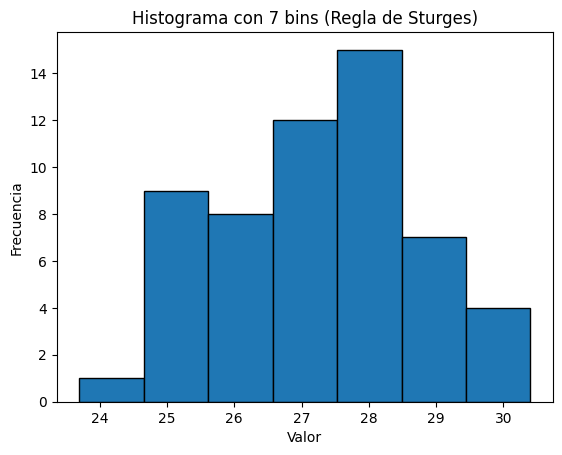

In [18]:
df2 = pd.read_csv('DF Problema2.csv')

# Aplicar la regla de Sturges
n = len(df2)
k = int(np.ceil(1 + np.log2(n)))  # número de bins según la regla de Sturges

# Crear el histograma
plt.hist(df2, bins=k, edgecolor='black')
plt.title(f'Histograma con {k} bins (Regla de Sturges)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


c:\Users\Aviance\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\Aviance\AppData\Local\Temp\ipykernel_21420\4210011161.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num_bins = int(np.ceil((range_max - range_min) / bin_width))


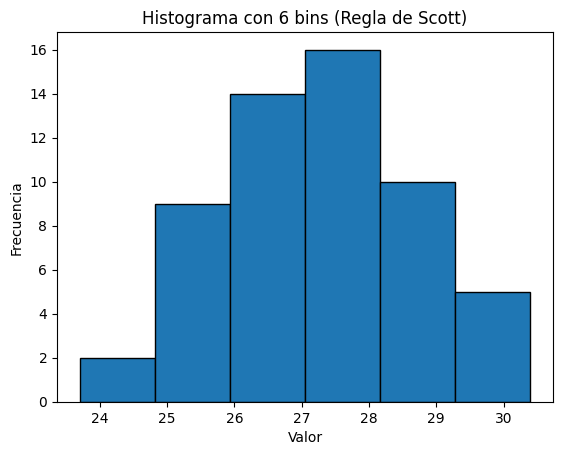

In [19]:
# Calcular la desviación estándar y el tamaño de la muestra
n = len(df2)
sigma = np.std(df2)

# Aplicar la regla de Scott
bin_width = 3.49 * sigma / (n ** (1/3))

# Calcular el número de bins
range_min, range_max = np.min(df2), np.max(df2)
num_bins = int(np.ceil((range_max - range_min) / bin_width))

# Crear el histograma
plt.hist(df2, bins=num_bins, edgecolor='black')
plt.title(f'Histograma con {num_bins} bins (Regla de Scott)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()